# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe

In [12]:

import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import json

path = r"C:\Users\Nicolas\Proyectos Programacion\Base-de-Datos-II\base-de-datos-ii\data\result.json"

data = json.load(open(path, encoding="utf-8"))
# data = open(path, encoding="utf-8")
# df = pd.read_json(path)
df = pd.DataFrame(data["messages"])
df


,id,type,date,date_unixtime,from,from_id,text,text_entities,file,mime_type,photo,width,height,actor,actor_id,action,members,reply_to_message_id,thumbnail
0,1181,message,2022-08-29T18:57:53,1661810273,Gabriel Arenas 🇦🇷,user192620519,Consulta para extraer datos con subqueries,"[{'type': 'plain', 'text': 'Consulta para extr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1182,message,2022-08-29T18:58:03,1661810283,Gabriel Arenas 🇦🇷,user192620519,"[SELECT re.rental_id ""CODIGORENTA"",\n r...","[{'type': 'plain', 'text': 'SELECT re.rental_i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1183,message,2022-09-05T17:20:50,1662409250,Gabriel Arenas 🇦🇷,user192620519,,[],(File not included. Change data exporting sett...,text/csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1184,message,2022-09-05T17:20:50,1662409250,Gabriel Arenas 🇦🇷,user192620519,,[],(File not included. Change data exporting sett...,application/vnd.ms-excel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1185,message,2022-09-05T19:12:06,1662415926,Gabriel Arenas 🇦🇷,user192620519,Foto de Gabriel Arenas,"[{'type': 'plain', 'text': 'Foto de Gabriel Ar...",NaN,NaN,(File not included. Change data exporting sett...,1060.0,1060.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1186,message,2022-09-08T13:33:13,1662654793,Gabriel Arenas 🇦🇷,user192620519,[OPEN WEEK UM\nLa Facultad de Ingeniería de la...,"[{'type': 'plain', 'text': 'OPEN WEEK UM La Fa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1187,message,2022-09-12T16:22:22,1663010542,Gabriel Arenas 🇦🇷,user192620519,"Estimados, no voy a ir esta tarde, estoy des...","[{'type': 'plain', 'text': 'Estimados, no voy...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1188,message,2022-09-12T16:23:05,1663010585,Gabriel Arenas 🇦🇷,user192620519,Les indico más tarde el título,"[{'type': 'plain', 'text': 'Les indico más tar...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1189,message,2022-09-12T16:25:58,1663010758,Douglas,user956019236,"Bueno profe, que se mejore!","[{'type': 'plain', 'text': 'Bueno profe, que s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1190,message,2022-09-12T17:16:42,1663013802,Ramiro Alberto Giandinoto,user261745196,Gracias Profe,"[{'type': 'plain', 'text': 'Gracias Profe'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Conocer los datos

- Observar que tipo de datos tiene el dataframe y que tipo de valores tiene
- Explicar que significa cada campo y que tipo de acciones quedan registradas

In [13]:
# Ver tamaño
print("Dimension")
df.shape
# Ver tipo de atributos
print("\n Atributos")
df.dtypes

Dimension

 Atributos


id                       int64
type                    object
date                    object
date_unixtime           object
from                    object
from_id                 object
text                    object
text_entities           object
file                    object
mime_type               object
photo                   object
width                  float64
height                 float64
actor                   object
actor_id                object
action                  object
members                 object
reply_to_message_id    float64
thumbnail               object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29 non-null     int64  
 1   type                 29 non-null     object 
 2   date                 29 non-null     object 
 3   date_unixtime        29 non-null     object 
 4   from                 25 non-null     object 
 5   from_id              25 non-null     object 
 6   text                 29 non-null     object 
 7   text_entities        29 non-null     object 
 8   file                 3 non-null      object 
 9   mime_type            3 non-null      object 
 10  photo                2 non-null      object 
 11  width                2 non-null      float64
 12  height               2 non-null      float64
 13  actor                4 non-null      object 
 14  actor_id             4 non-null      object 
 15  action               4 non-null      objec

## Datos faltantes

- Analizar de manera visual y no visual si existen datos faltantes

In [15]:
faltantes = []
print(df.columns)
for columna in df.columns:
    atributo = {}
    atributo["column"] = columna

    atributo["percentage"] = np.mean(df[columna].isnull())*100

    atributo["quantity"] = np.sum(df[columna].isnull())
    faltantes.append(atributo)  

faltantes_df = pd.DataFrame(faltantes)

faltantes_df

Index(['id', 'type', 'date', 'date_unixtime', 'from', 'from_id', 'text',
       'text_entities', 'file', 'mime_type', 'photo', 'width', 'height',
       'actor', 'actor_id', 'action', 'members', 'reply_to_message_id',
       'thumbnail'],
      dtype='object')


,column,percentage,quantity
0,id,0.000000,0
1,type,0.000000,0
2,date,0.000000,0
3,date_unixtime,0.000000,0
4,from,13.793103,4
5,from_id,13.793103,4
6,text,0.000000,0
7,text_entities,0.000000,0
8,file,89.655172,26
9,mime_type,89.655172,26


<AxesSubplot: >

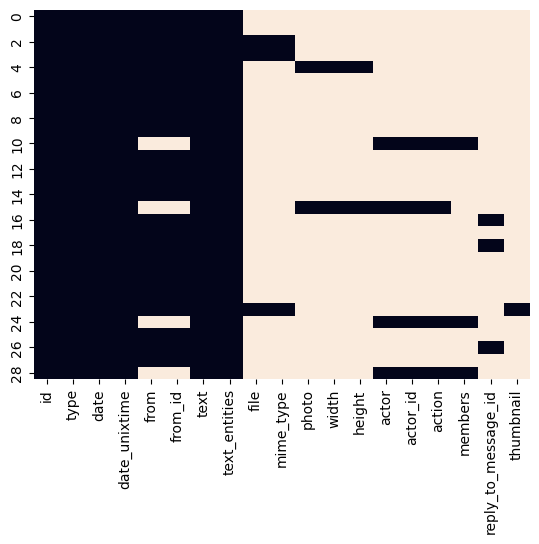

In [16]:

sns.heatmap(df.isnull(), cbar=False)

- Tratar datos faltantes en el caso que los haya
- Explicar qué método se utilizó y por qué

In [17]:
df_notna = df.copy(deep=False)
df_fl_c = faltantes_df.loc[(faltantes_df['percentage'] > 70)]
print(df_fl_c)

df_notna = df_notna.drop(df_fl_c['column'], axis=1)

                 column  percentage  quantity
8                  file   89.655172        26
9             mime_type   89.655172        26
10                photo   93.103448        27
11                width   93.103448        27
12               height   93.103448        27
13                actor   86.206897        25
14             actor_id   86.206897        25
15               action   86.206897        25
16              members   89.655172        26
17  reply_to_message_id   89.655172        26
18            thumbnail   96.551724        28


## Outliers

- Analizar de manera visual y no visual si existen valores atípicos para cada valor no categórico

In [18]:
df.describe()


,id,width,height,reply_to_message_id
count,29.000000,2.000000,2.000000,3.000000
mean,1251.448276,850.000000,850.000000,1302.333333
std,75.763064,296.984848,296.984848,76.787586
min,1181.000000,640.000000,640.000000,1258.000000
25%,1188.000000,745.000000,745.000000,1258.000000
50%,1258.000000,850.000000,850.000000,1258.000000
75%,1267.000000,955.000000,955.000000,1324.500000
max,1398.000000,1060.000000,1060.000000,1391.000000


- Si existen valores atípicos, ¿estos son causados por errores en la carga de datos o por otra razón?. Explicar la razón

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                      79.0
width                  210.0
height                 210.0
reply_to_message_id     66.5
dtype: float64


In [20]:
# Rangos normales de datos
rango_inferior = Q1 - 1.5 * IQR
rango_superior = Q3 + 1.5 * IQR

print("Rango superior")
print(rango_inferior)
print("Rango inferior")
print(rango_superior)

Rango superior
id                     1069.50
width                   430.00
height                  430.00
reply_to_message_id    1158.25
dtype: float64
Rango inferior
id                     1385.50
width                  1270.00
height                 1270.00
reply_to_message_id    1424.25
dtype: float64


In [21]:
#Mostrar si un valor es atípico o no
df_outliers = (df < rango_inferior) | (df > rango_superior)
df_outliers

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_9960\2758584055.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (df < rango_inferior) | (df > rango_superior)


,action,actor,actor_id,date,date_unixtime,file,from,from_id,height,id,members,mime_type,photo,reply_to_message_id,text,text_entities,thumbnail,type,width
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

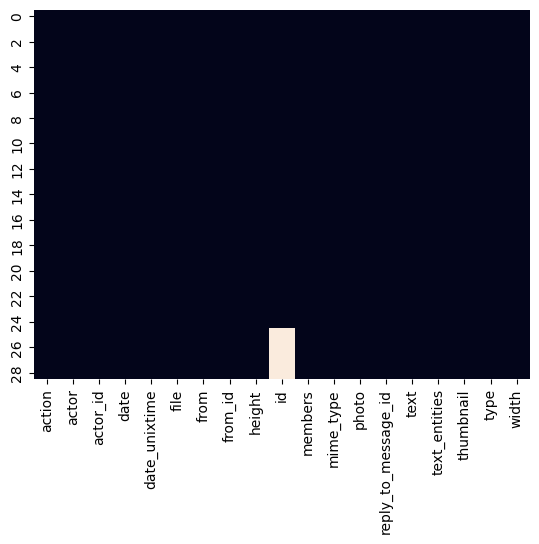

In [22]:
#Mostar mapa de calor para identificar los valores atípicos
sns.heatmap(df_outliers, cbar=False)